In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pint
import os
import pandas as pd

In [2]:
unit = pint.UnitRegistry()

# Part 1

In [46]:
data = np.array([
    [4.7, 10, 31.6, 68.4, 0.47, 4.62e-1],
    [0.33, 0.15, 68.6, 31.4, 2.2, 2.185]
]) * np.array([unit.kiloohm, unit.kiloohm, unit.centimeter, unit.centimeter, unit.dimensionless, unit.dimensionless  ])
TABLE_2_6_df = pd.DataFrame(data, columns=[r"$R_1 (k\Omega)$",r"$R_4 (k\Omega)$", r"$L_2 (cm)$",r"$L_3 (cm)$" , r"$\frack{R_1}{R_4}$", r"$\frack{L_2}{L_3}$"])

In [48]:
TABLE_2_6_df 

,$R_1 (k\Omega)$,$R_4 (k\Omega)$,$L_2 (cm)$,$L_3 (cm)$,$\frack{R_1}{R_4}$,$\frack{L_2}{L_3}$
0,4.7 kiloohm,10.0 kiloohm,31.6 centimeter,68.4 centimeter,0.47 dimensionless,0.462 dimensionless
1,0.33 kiloohm,0.15 kiloohm,68.6 centimeter,31.4 centimeter,2.2 dimensionless,2.185 dimensionless


# Part 2

In [69]:
TABLE_2_7 = np.array([
    [1, 61.6, 38.4, 1.6, 1],
    [0.7, 43.5, 56.5, 0.77, 1],
    [0.5, 28.5, 71.5, 3.986e-1, 1],
    [0.35, 15.8, 84.2, 1.88e-1, 1], 
]) *  np.array([unit.millimeter, unit.centimeter, unit.centimeter, 1/unit.ohm, unit.ohm ]) 
# ! 1/ ohm is putten due to our misscalculation in table 2.7 on lab manual.

TABLE_2_7_df = pd.DataFrame(TABLE_2_7, columns=[r"$d (mm)$", r"$L_2 (cm)$",r"$L_3 (cm)$" , r"$R_1 (Calculated)$", r"$R_4$"])


In [70]:
TABLE_2_7_df

,$d (mm)$,$L_2 (cm)$,$L_3 (cm)$,$R_1 (Calculated)$,$R_4$
0,1.0 millimeter,61.6 centimeter,38.4 centimeter,1.6 / ohm,1.0 ohm
1,0.7 millimeter,43.5 centimeter,56.5 centimeter,0.77 / ohm,1.0 ohm
2,0.5 millimeter,28.5 centimeter,71.5 centimeter,0.3986 / ohm,1.0 ohm
3,0.35 millimeter,15.8 centimeter,84.2 centimeter,0.188 / ohm,1.0 ohm


In [71]:

# todo: taken the Multiplication inerse becouse was calculated on the LAb Manual wrong way. by doing this we are currecting.
TABLE_2_7_df["$R_1 (Calculated)$"] = 1/TABLE_2_7_df["$R_1 (Calculated)$"]   
TABLE_2_7_df

,$d (mm)$,$L_2 (cm)$,$L_3 (cm)$,$R_1 (Calculated)$,$R_4$
0,1.0 millimeter,61.6 centimeter,38.4 centimeter,0.625 ohm,1.0 ohm
1,0.7 millimeter,43.5 centimeter,56.5 centimeter,1.2987012987012987 ohm,1.0 ohm
2,0.5 millimeter,28.5 centimeter,71.5 centimeter,2.5087807325639737 ohm,1.0 ohm
3,0.35 millimeter,15.8 centimeter,84.2 centimeter,5.319148936170213 ohm,1.0 ohm


In [84]:

# Specify the directory to save the PNG files
output_directory = "output_plots/"  # Specify your output directory
if not os.path.exists(output_directory):
    os.makedirs(output_directory)  # Ensure this directory exists or create it


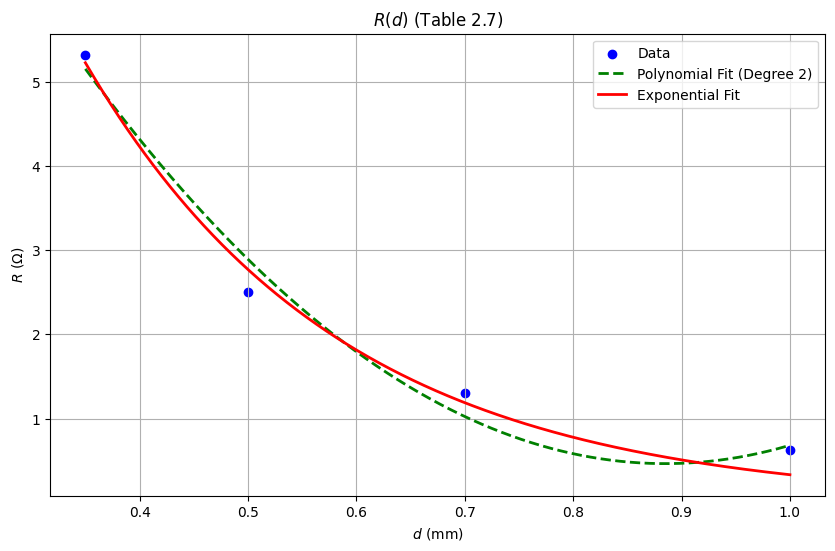

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import os

def exponential_func(d, a, b):
    return a * np.exp(b * d)

Degree = 2
poly_features = PolynomialFeatures(degree=Degree)
d_table_2_7 = np.array([i.magnitude for i in TABLE_2_7_df["$d (mm)$"]])
R_1_table_2_7 = np.array([i.magnitude for i in TABLE_2_7_df["$R_1 (Calculated)$"]])

d_poly = poly_features.fit_transform(d_table_2_7.reshape(-1, 1))
R_model = LinearRegression()
R_model.fit(d_poly, R_1_table_2_7)

d_linspace = np.linspace(min(d_table_2_7), max(d_table_2_7), 1000)
d_linspace_poly = poly_features.fit_transform(d_linspace.reshape(-1,1))
R_pred_poly = R_model.predict(d_linspace_poly)

popt, _ = curve_fit(exponential_func, d_table_2_7, R_1_table_2_7, p0=(1, 0.01))  # Initial guess for a and b
R_pred_exp = exponential_func(d_linspace, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(d_table_2_7, R_1_table_2_7, color='blue', marker='o', label='Data')
plt.plot(d_linspace, R_pred_poly, color='green', linestyle='--', label=f'Polynomial Fit (Degree {Degree})', linewidth=2)
plt.plot(d_linspace, R_pred_exp, color='red', label='Exponential Fit', linewidth=2)

plt.title('$R(d)$ (Table 2.7)')
plt.xlabel('$d$ (mm)')
plt.ylabel('$R$ $(\Omega)$')
plt.grid(True)

plt.legend()

plt.savefig(os.path.join(output_directory, 'resistance_vs_diameter_table_2_7.png'))

plt.show()
plt.close()  


In [75]:
TABLE_2_7_df

,$d (mm)$,$L_2 (cm)$,$L_3 (cm)$,$R_1 (Calculated)$,$R_4$
0,1.0 millimeter,61.6 centimeter,38.4 centimeter,0.625 ohm,1.0 ohm
1,0.7 millimeter,43.5 centimeter,56.5 centimeter,1.2987012987012987 ohm,1.0 ohm
2,0.5 millimeter,28.5 centimeter,71.5 centimeter,2.5087807325639737 ohm,1.0 ohm
3,0.35 millimeter,15.8 centimeter,84.2 centimeter,5.319148936170213 ohm,1.0 ohm


In [112]:
d_value = 0.5 * unit.millimeter
L_value = 100 * unit.centimeter
r_value_pred = exponential_func(d_value.magnitude, *popt) *unit.ohm
print(format(r_value_pred, ".3f") ) #taking some resistance with 0.5 mm diameter  


2.770 ohm


In [113]:
rho = lambda R, d, L: (R*np.pi*(d**2))/(4*L)
rho(r_value_pred, d_value, L_value).to(unit.ohm * unit.centimeter)

<Quantity(5.43968258e-05, 'ohm * centimeter')>